In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [5]:
def f(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else:
        return np.exp((x-1)/3) + np.exp((x-1) ** 3)

In [12]:
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

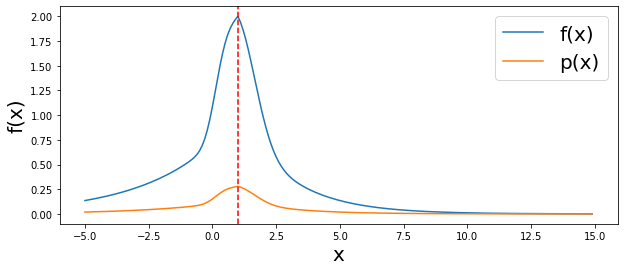

In [34]:
NORM_CONSTANT = 7.16556

x_vals = np.arange(-5, 15, .1)
f_vals = [f(x) for x in x_vals]
p_vals = [x/NORM_CONSTANT for x in f_vals]

plt.figure(figsize=(10, 4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)

plt.axvline(1, color='r', linestyle='--')

<h2>Accept-Reject

Text(0.5, 1.0, 'M=1')

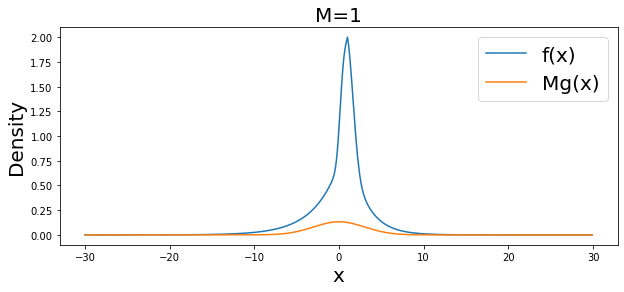

In [15]:
x_vals = np.arange(-30, 30, .1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 3)
M = 1

plt.figure(figsize=(10, 4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M * g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=10')

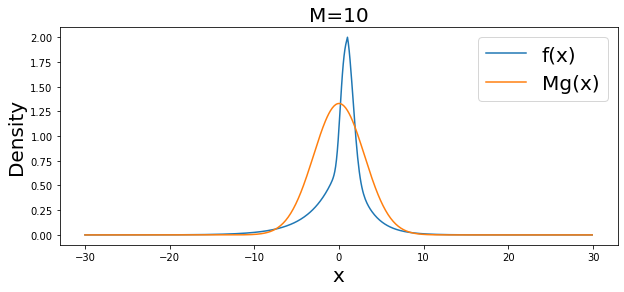

In [16]:
x_vals = np.arange(-30, 30, .1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 3)
M = 10

plt.figure(figsize=(10, 4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M * g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=1000')

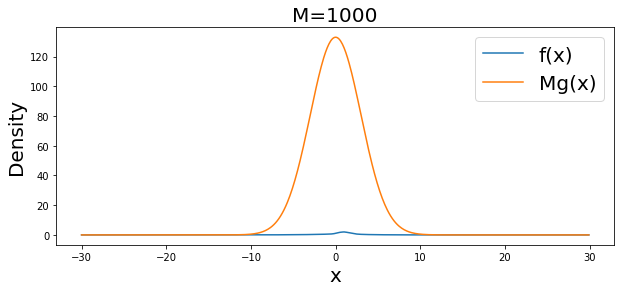

In [17]:
x_vals = np.arange(-30, 30, .1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 3)
M = 1000

plt.figure(figsize=(10, 4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M * g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

(0.0, 0.05)

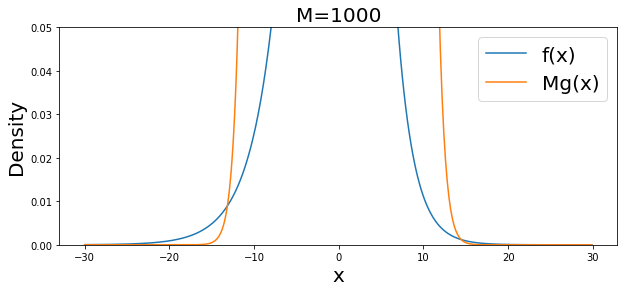

In [18]:
x_vals = np.arange(-30, 30, .1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 3)
M = 1000

plt.figure(figsize=(10, 4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M * g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)
plt.ylim(0, 0.05)

In [22]:
samples = []
N = 1000000

for x in range(0, N):
    candidate = np.random.normal(0, 3)
    prob_accept = f(candidate) / (M * g(candidate, 0, 3))
    
    if prob_accept > np.random.random():
        samples.append(candidate)

In [23]:
print("Num samples collected: ", len(samples))

Num samples collected:  6834


In [24]:
print("Efficiency: ", len(samples) / N)

Efficiency:  0.006834


(-15.0, 15.0)

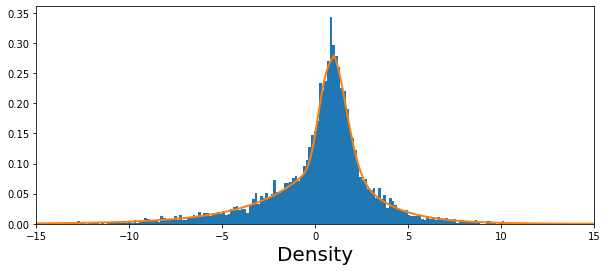

In [25]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONSTANT for f in f_vals], linewidth=2)
plt.xlim(-15, 15)

<h2>Accept Reject with N(1, 4) Candidate

Text(0.5, 1.0, 'M=1')

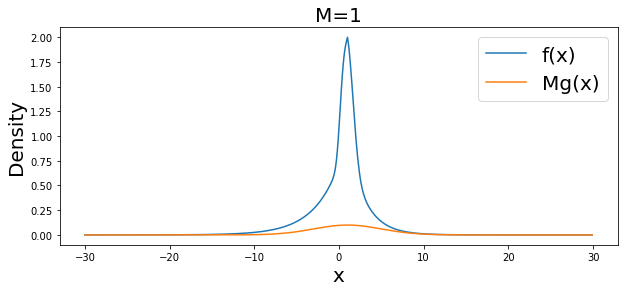

In [26]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1, 4)
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=75')

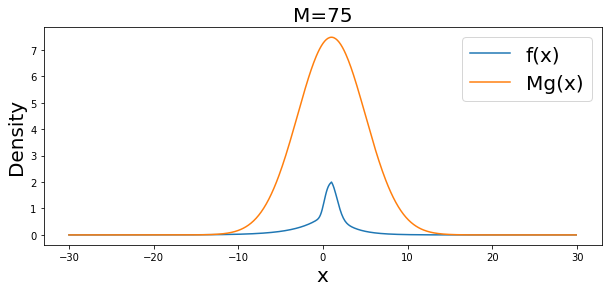

In [27]:
x_vals = np.arange(-30, 30, .1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1, 4)
M = 75

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M * g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)


(0.0, 0.05)

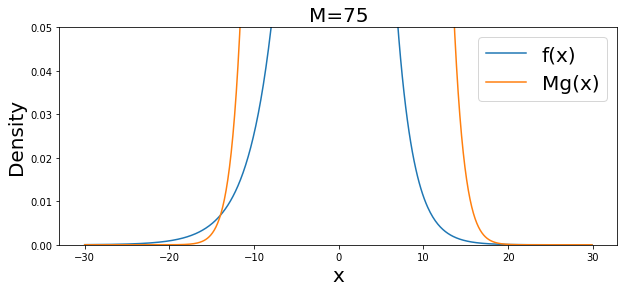

In [28]:
x_vals = np.arange(-30, 30, .1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1, 4)
M = 75

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M * g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)
plt.ylim(0, 0.05)

(-15.0, 15.0)

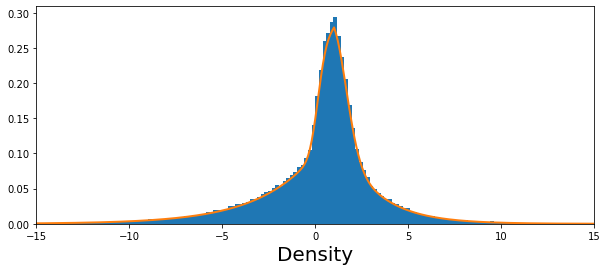

In [30]:
samples = []
N = 1000000

for x in range(0, N):
    candidate = np.random.normal(1, 4)
    prob_accept = f(candidate) / (M * g(candidate, 1, 4))
    
    if prob_accept > np.random.random():
        samples.append(candidate)

plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONSTANT for f in f_vals], linewidth=2)
plt.xlim(-15, 15)

<h2>Metropolis Hastings

In [31]:
samples = [1]
num_accept = 0
for _ in range(N):
    #sample candidate from normal distribution
    candidate = np.random.normal(samples[-1], 4)
    
    #calculate probability of accepting this candidate
    prob = min(1, f(candidate) / f(samples[-1]))
    
    #accept with the calculated probability
    if np.random.random() < prob:
        samples.append(candidate)
        num_accept += 1
        
    #otherwise report current sample again
    else:
        samples.append(samples[-1])

In [32]:
burn_in = 1000
retained_samples = samples[burn_in + 1:]
print("Efficiency: ", len(retained_samples) / N)

Efficiency:  0.999


(-15.0, 15.0)

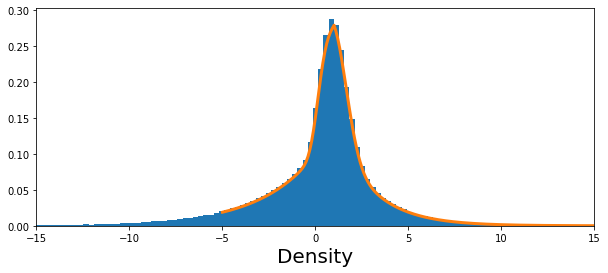

In [35]:
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONSTANT for f in f_vals], linewidth=3)
plt.xlim(-15, 15)
